# 🏥 Health Risk Prediction: Smoking & Drinking Analysis

Data science project to predict smoking/drinking behaviors and cardiovascular risk using medical health check-up data. Apply ML techniques for preventive healthcare interventions.

## 1. Data loading and visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# loading and visualizing the dataset
df = pd.read_csv('../data/smoking-drinking_dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [12]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

(991346, 24)

In [9]:
# checking and handling missing values
columns_with_missing_values = df.columns[df.isnull().any()]

print("Missing value percentage:")
if columns_with_missing_values.empty:
    print("No missing values found.")
else:
    for column in columns_with_missing_values:
        print(column,":",df[column].isnull().sum()/df.shape[0]*100)

Missing value percentage:
No missing values found.


In [14]:
# Note that the dataset has several categorical features represented as numerical codes.

# Defining manually the categorical columns
categorical_columns = ['sex', 'DRK_YN', 'SMK_stat_type_cd', 
                       'hear_left', 'hear_right', 'urine_protein']

print("=" * 50)
print("CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 50)

for column in categorical_columns:
    print(f"\n{column.upper()}")
    print("-" * 30)
    counts = df[column].value_counts()
    print(counts)
    
    # Calcola percentuali
    percentages = df[column].value_counts(normalize=True) * 100
    print("\nPercentages:")
    print(percentages.round(2))
    print("=" * 50)

CATEGORICAL FEATURES DISTRIBUTION

SEX
------------------------------
sex
Male      526415
Female    464931
Name: count, dtype: int64

Percentages:
sex
Male      53.1
Female    46.9
Name: proportion, dtype: float64

DRK_YN
------------------------------
DRK_YN
N    495858
Y    495488
Name: count, dtype: int64

Percentages:
DRK_YN
N    50.02
Y    49.98
Name: proportion, dtype: float64

SMK_STAT_TYPE_CD
------------------------------
SMK_stat_type_cd
1.0    602441
3.0    213954
2.0    174951
Name: count, dtype: int64

Percentages:
SMK_stat_type_cd
1.0    60.77
3.0    21.58
2.0    17.65
Name: proportion, dtype: float64

HEAR_LEFT
------------------------------
hear_left
1.0    960124
2.0     31222
Name: count, dtype: int64

Percentages:
hear_left
1.0    96.85
2.0     3.15
Name: proportion, dtype: float64

HEAR_RIGHT
------------------------------
hear_right
1.0    961134
2.0     30212
Name: count, dtype: int64

Percentages:
hear_right
1.0    96.95
2.0     3.05
Name: proportion, dtype: flo

## 2. EDA

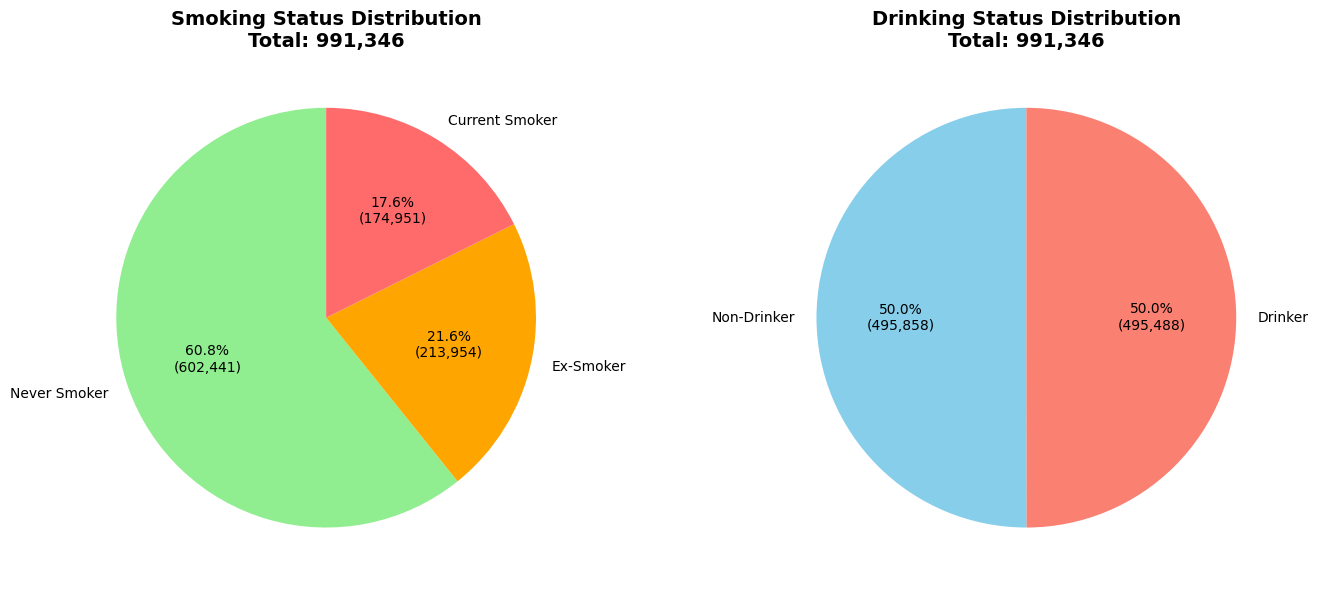

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Smoking Status
smoking_counts = df['SMK_stat_type_cd'].value_counts()
total_smoking = smoking_counts.sum()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

axes[0].pie(
    smoking_counts,
    labels=['Never Smoker', 'Ex-Smoker', 'Current Smoker'],
    autopct=make_autopct(smoking_counts),
    colors=['#90EE90', '#FFA500', '#FF6B6B'],
    startangle=90
)
axes[0].set_title(f'Smoking Status Distribution\nTotal: {total_smoking:,}', 
                  fontsize=14, fontweight='bold')

# 2. Drinking Status
drinking_counts = df['DRK_YN'].value_counts()
total_drinking = drinking_counts.sum()

axes[1].pie(
    drinking_counts,
    labels=['Non-Drinker', 'Drinker'],
    autopct=make_autopct(drinking_counts),
    colors=['#87CEEB', '#FA8072'],
    startangle=90
)
axes[1].set_title(f'Drinking Status Distribution\nTotal: {total_drinking:,}', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Smoking-related features

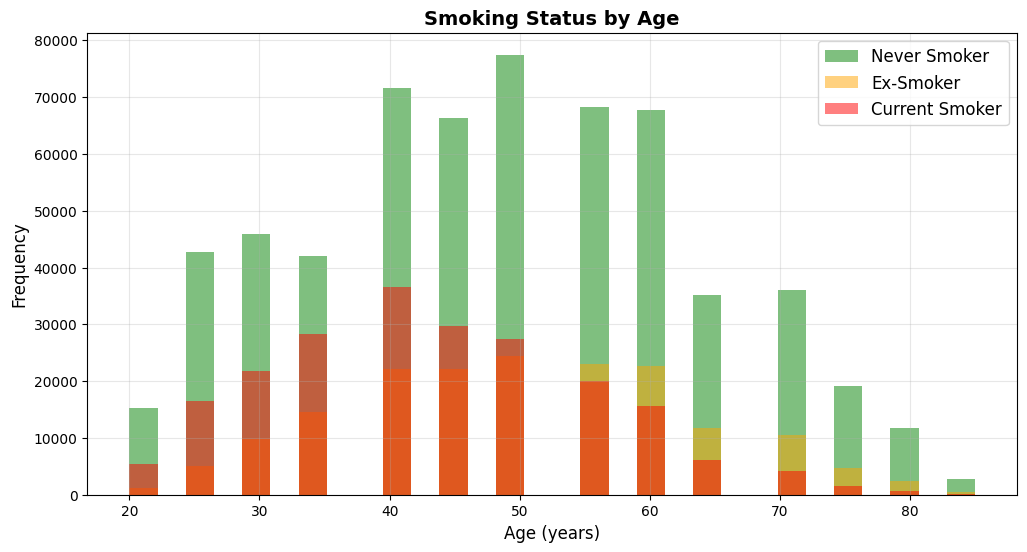

In [18]:
# Age vs Smoking Status (3 categories)
plt.figure(figsize=(12, 6))

df[df['SMK_stat_type_cd']==1]['age'].plot.hist(
    bins=30, alpha=0.5, color='green', label='Never Smoker'
)
df[df['SMK_stat_type_cd']==2]['age'].plot.hist(
    bins=30, alpha=0.5, color='orange', label='Ex-Smoker'
)
df[df['SMK_stat_type_cd']==3]['age'].plot.hist(
    bins=30, alpha=0.5, color='red', label='Current Smoker'
)

plt.legend(fontsize=12)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Smoking Status by Age', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()


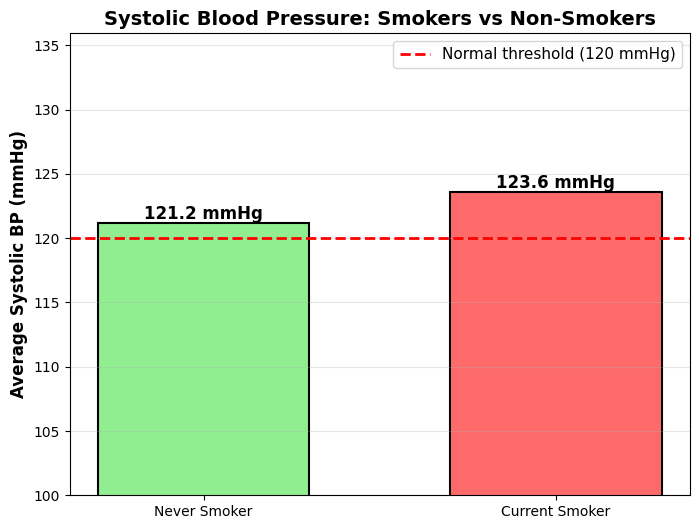

In [41]:
# Systolic Blood Pressure vs Smoking - BAR CHART
plt.figure(figsize=(8, 6))

sbp_means = df[df['SMK_stat_type_cd'].isin([1, 3])].groupby('SMK_stat_type_cd')['SBP'].mean()
colors = ['#90EE90', '#FF6B6B']
bars = plt.bar(['Never Smoker', 'Current Smoker'], sbp_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} mmHg',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=120, color='red', linestyle='--', linewidth=2, label='Normal threshold (120 mmHg)')
plt.ylabel('Average Systolic BP (mmHg)', fontsize=12, fontweight='bold')
plt.title('Systolic Blood Pressure: Smokers vs Non-Smokers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(100, max(sbp_means) * 1.1)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Current smokers show elevated systolic blood pressure (123.6 mmHg) compared to never smokers (121.2 mmHg), with a difference of 2.4 mmHg. Both groups cluster near the normal threshold (120 mmHg), but smokers demonstrate a clear rightward shift indicating increased cardiovascular risk. This feature will serve as a moderate predictor for smoking status classification.

**Feature Importance**: ⭐⭐ Moderate predictor - The difference is statistically significant and aligns with medical literature confirming smoking's impact on blood pressure regulation.

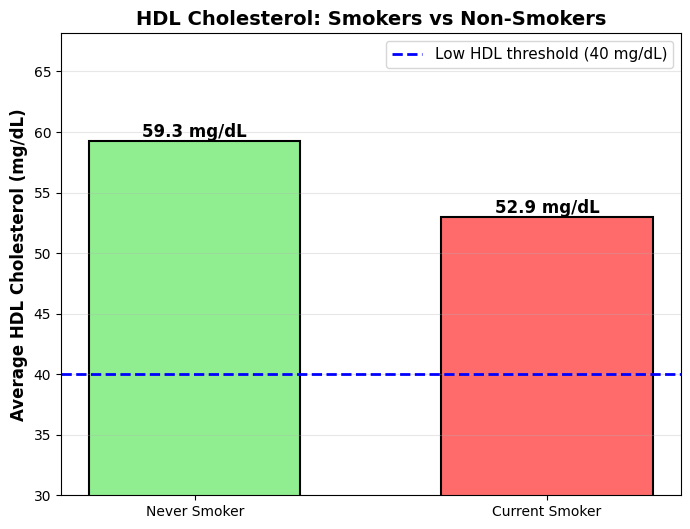

In [42]:
# HDL Cholesterol vs Smoking - BAR CHART
plt.figure(figsize=(8, 6))

hdl_means = df[df['SMK_stat_type_cd'].isin([1, 3])].groupby('SMK_stat_type_cd')['HDL_chole'].mean()
colors = ['#90EE90', '#FF6B6B']
bars = plt.bar(['Never Smoker', 'Current Smoker'], hdl_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} mg/dL',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=40, color='blue', linestyle='--', linewidth=2, label='Low HDL threshold (40 mg/dL)')
plt.ylabel('Average HDL Cholesterol (mg/dL)', fontsize=12, fontweight='bold')
plt.title('HDL Cholesterol: Smokers vs Non-Smokers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(30, max(hdl_means) * 1.15)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Current smokers exhibit significantly lower HDL levels (52.9 mg/dL) compared to never smokers (59.3 mg/dL), representing a 10.8% reduction in good cholesterol. This 6.4 mg/dL difference is clinically meaningful and aligns with established cardiovascular research showing smoking's negative impact on HDL metabolism.

**Feature Importance**: ⭐⭐⭐ Strong predictor - The clear separation makes HDL a valuable feature for smoking status classification, particularly when combined with blood pressure and other cardiovascular markers.

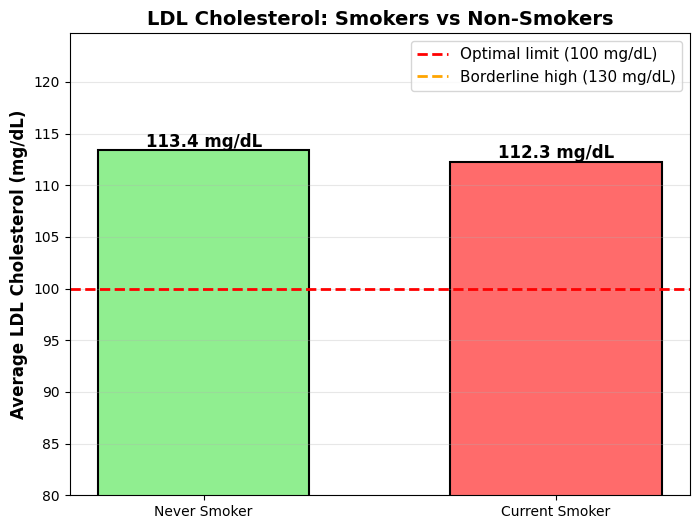

In [43]:
# LDL Cholesterol vs Smoking - BAR CHART
plt.figure(figsize=(8, 6))

ldl_means = df[df['SMK_stat_type_cd'].isin([1, 3])].groupby('SMK_stat_type_cd')['LDL_chole'].mean()
colors = ['#90EE90', '#FF6B6B']
bars = plt.bar(['Never Smoker', 'Current Smoker'], ldl_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} mg/dL',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Optimal limit (100 mg/dL)')
plt.axhline(y=130, color='orange', linestyle='--', linewidth=2, label='Borderline high (130 mg/dL)')
plt.ylabel('Average LDL Cholesterol (mg/dL)', fontsize=12, fontweight='bold')
plt.title('LDL Cholesterol: Smokers vs Non-Smokers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(80, max(ldl_means) * 1.1)
plt.grid(axis='y', alpha=0.3)
plt.show()


**Analysis**: LDL cholesterol shows minimal difference between never smokers (113.4 mg/dL) and current smokers (112.3 mg/dL), with only a 1.0 mg/dL variation. Both groups exceed the optimal limit (100 mg/dL) but remain below borderline high (130 mg/dL). The high overlap suggests LDL is influenced by multiple confounding factors beyond smoking status.

**Feature Importance**: ⭐ Weak predictor - Limited predictive power due to substantial inter-group similarity. LDL will contribute minimally to smoking classification models.

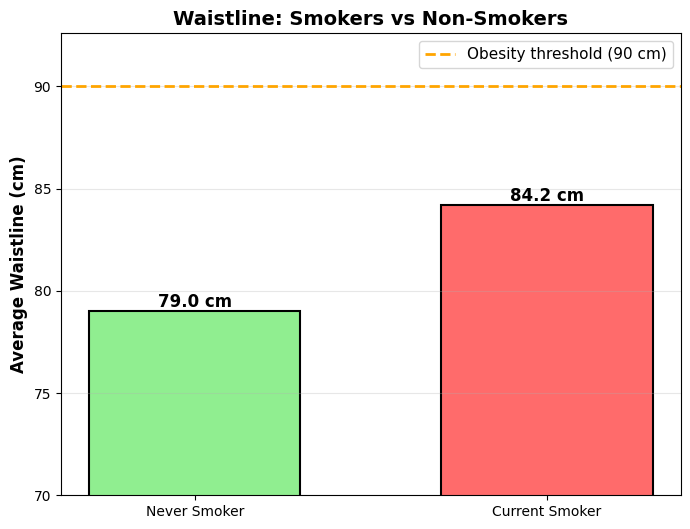

In [44]:
# Waistline vs Smoking - BAR CHART
plt.figure(figsize=(8, 6))

waist_means = df[df['SMK_stat_type_cd'].isin([1, 3])].groupby('SMK_stat_type_cd')['waistline'].mean()
colors = ['#90EE90', '#FF6B6B']
bars = plt.bar(['Never Smoker', 'Current Smoker'], waist_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} cm',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=90, color='orange', linestyle='--', linewidth=2, label='Obesity threshold (90 cm)')
plt.ylabel('Average Waistline (cm)', fontsize=12, fontweight='bold')
plt.title('Waistline: Smokers vs Non-Smokers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(70, max(waist_means) * 1.1)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Current smokers display larger waistlines (84.2 cm) compared to never smokers (79.0 cm), showing a 5.2 cm difference. Both groups remain below the obesity threshold (90 cm), but smokers demonstrate a shift toward higher values. This unexpected pattern (contrary to nicotine's appetite-suppressing effects) may reflect other lifestyle factors.

**Feature Importance**: ⭐ Limited predictor - While statistically significant, waistline shows high variability and will have limited standalone predictive power for smoking status classification.

### Drinking-related features

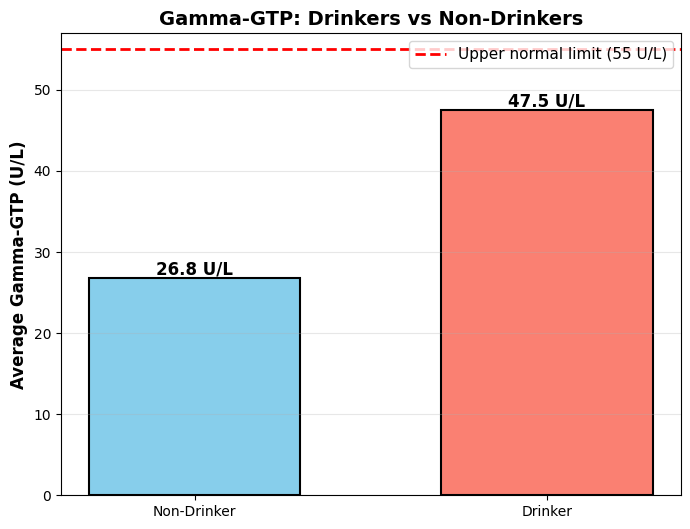

In [46]:
# Gamma-GTP vs Drinking - BAR CHART
plt.figure(figsize=(8, 6))

gtp_means = df.groupby('DRK_YN')['gamma_GTP'].mean()
colors = ['#87CEEB', '#FA8072']
bars = plt.bar(['Non-Drinker', 'Drinker'], gtp_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} U/L',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=55, color='red', linestyle='--', linewidth=2, label='Upper normal limit (55 U/L)')
plt.ylabel('Average Gamma-GTP (U/L)', fontsize=12, fontweight='bold')
plt.title('Gamma-GTP: Drinkers vs Non-Drinkers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(0, max(gtp_means) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Gamma-GTP demonstrates exceptional discriminative power with drinkers showing 77% higher levels (47.5 U/L) compared to non-drinkers (26.8 U/L). Drinkers approach the upper normal limit (55 U/L) while non-drinkers remain well below it. This confirms gamma-GTP as the most specific biomarker for alcohol consumption.

**Feature Importance**: ⭐⭐⭐⭐⭐ PRIMARY predictor - This feature will be the strongest predictor for drinking status, potentially achieving high accuracy independently due to clear separation between groups.

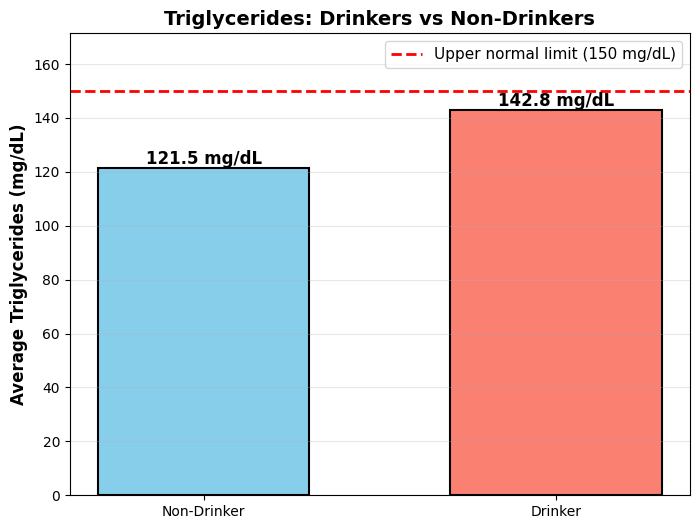

In [47]:
# Triglycerides vs Drinking - BAR CHART
plt.figure(figsize=(8, 6))

trig_means = df.groupby('DRK_YN')['triglyceride'].mean()
colors = ['#87CEEB', '#FA8072']
bars = plt.bar(['Non-Drinker', 'Drinker'], trig_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} mg/dL',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=150, color='red', linestyle='--', linewidth=2, label='Upper normal limit (150 mg/dL)')
plt.ylabel('Average Triglycerides (mg/dL)', fontsize=12, fontweight='bold')
plt.title('Triglycerides: Drinkers vs Non-Drinkers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(0, max(trig_means) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Drinkers show elevated triglyceride levels (142.8 mg/dL) compared to non-drinkers (121.5 mg/dL), representing a 17.5% increase. Drinkers approach the upper normal limit (150 mg/dL) while non-drinkers remain comfortably below it. This metabolic marker reflects alcohol's significant impact on lipid metabolism.

**Feature Importance**: ⭐⭐⭐ Strong predictor - Triglycerides will serve as a valuable secondary feature for drinking status classification, particularly when combined with liver enzyme markers (gamma-GTP, AST, ALT).

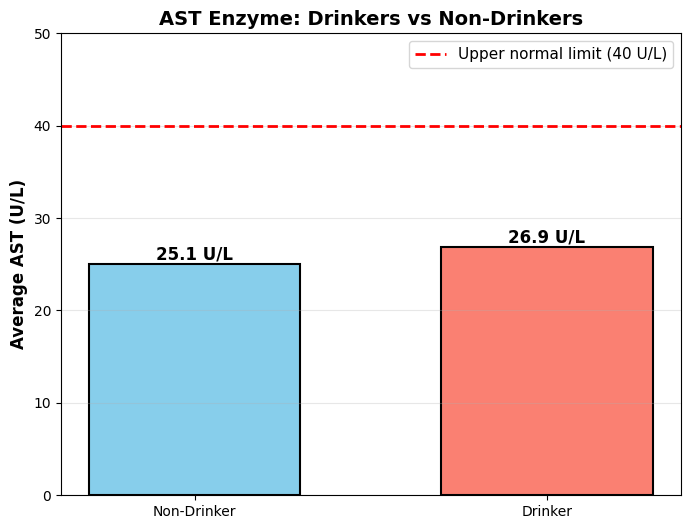

In [48]:
# AST vs Drinking - BAR CHART
plt.figure(figsize=(8, 6))

ast_means = df.groupby('DRK_YN')['SGOT_AST'].mean()
colors = ['#87CEEB', '#FA8072']
bars = plt.bar(['Non-Drinker', 'Drinker'], ast_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} U/L',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=40, color='red', linestyle='--', linewidth=2, label='Upper normal limit (40 U/L)')
plt.ylabel('Average AST (U/L)', fontsize=12, fontweight='bold')
plt.title('AST Enzyme: Drinkers vs Non-Drinkers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(0, 50)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Drinkers display slightly elevated AST levels (26.9 U/L) versus non-drinkers (25.1 U/L), representing a 7.2% increase. Both groups stay within normal ranges (<40 U/L), suggesting AST is less sensitive than gamma-GTP for detecting moderate alcohol consumption. AST will serve as a supporting biomarker in the classification model.

**Feature Importance**: ⭐⭐ Supporting predictor - Useful in combination with other liver enzymes but limited standalone discriminative power due to high inter-group overlap.

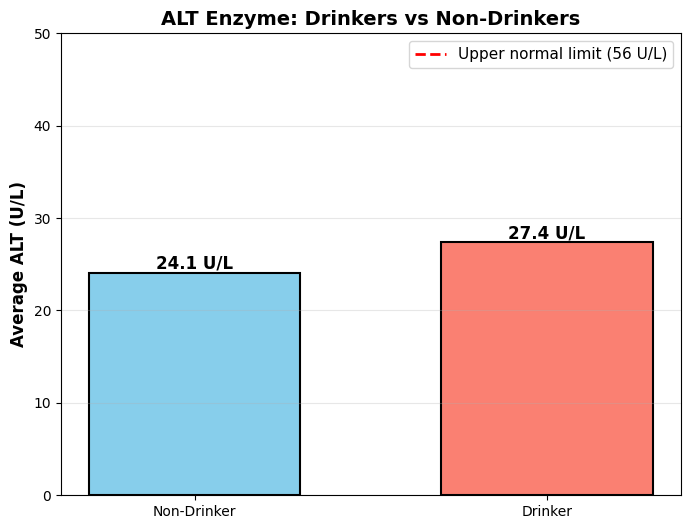

In [49]:
# ALT vs Drinking - BAR CHART
plt.figure(figsize=(8, 6))

alt_means = df.groupby('DRK_YN')['SGOT_ALT'].mean()
colors = ['#87CEEB', '#FA8072']
bars = plt.bar(['Non-Drinker', 'Drinker'], alt_means, 
               color=colors, edgecolor='black', linewidth=1.5, width=0.6)

# Aggiungi valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f} U/L',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.axhline(y=56, color='red', linestyle='--', linewidth=2, label='Upper normal limit (56 U/L)')
plt.ylabel('Average ALT (U/L)', fontsize=12, fontweight='bold')
plt.title('ALT Enzyme: Drinkers vs Non-Drinkers', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim(0, 50)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Analysis**: Drinkers exhibit elevated ALT levels (27.4 U/L) compared to non-drinkers (24.1 U/L), showing a 13.7% increase. Both groups remain well below the upper normal limit (56 U/L), indicating that ALT elevation is primarily observed in heavy or chronic drinkers. This liver enzyme marker will contribute as a secondary predictor in the drinking status model.

**Feature Importance**: ⭐⭐ Secondary predictor - Moderate discriminative power when combined with gamma-GTP and AST for comprehensive liver function assessment.

### Feature Importance Summary

| Target | Feature | Mean Difference | Importance | Role in Model |
|--------|---------|----------------|------------|---------------|
| **Smoking** | SBP | +2.4 mmHg | ⭐⭐ | Moderate predictor |
| **Smoking** | HDL | -6.4 mg/dL | ⭐⭐⭐ | Strong predictor |
| **Smoking** | LDL | -1.0 mg/dL | ⭐ | Weak predictor |
| **Smoking** | Waistline | +5.2 cm | ⭐ | Limited predictor |
| **Drinking** | Gamma-GTP | +20.7 U/L (+77%) | ⭐⭐⭐⭐⭐ | **PRIMARY** predictor |
| **Drinking** | Triglycerides | +21.3 mg/dL (+17.5%) | ⭐⭐⭐ | Strong predictor |
| **Drinking** | AST | +1.8 U/L (+7.2%) | ⭐⭐ | Supporting predictor |
| **Drinking** | ALT | +3.3 U/L (+13.7%) | ⭐⭐ | Secondary predictor |

**Key Insights**:
- Gamma-GTP stands out as the most discriminative feature with a 77% difference between groups
- HDL shows the strongest separation for smoking status with a 10.8% reduction in smokers
- LDL has minimal predictive value due to high inter-group overlap
- Liver enzymes (gamma-GTP, ALT, AST) combined will provide robust drinking status prediction
- Cardiovascular markers (SBP, HDL) will be most effective for smoking status classification

## 3. Data preparation for modeling

In [50]:
# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode sex (Male/Female → 0/1)
df['sex'] = le.fit_transform(df['sex'])
print("Sex encoded:", df['sex'].unique())

# Encode drinking status (Y/N → 1/0) - TARGET VARIABLE
df['DRK_YN'] = le.fit_transform(df['DRK_YN'])
print("Drinking encoded:", df['DRK_YN'].unique())

# Note: SMK_stat_type_cd, hear_left/right, urine_protein are already numeric

Sex encoded: [1 0]
Drinking encoded: [1 0]


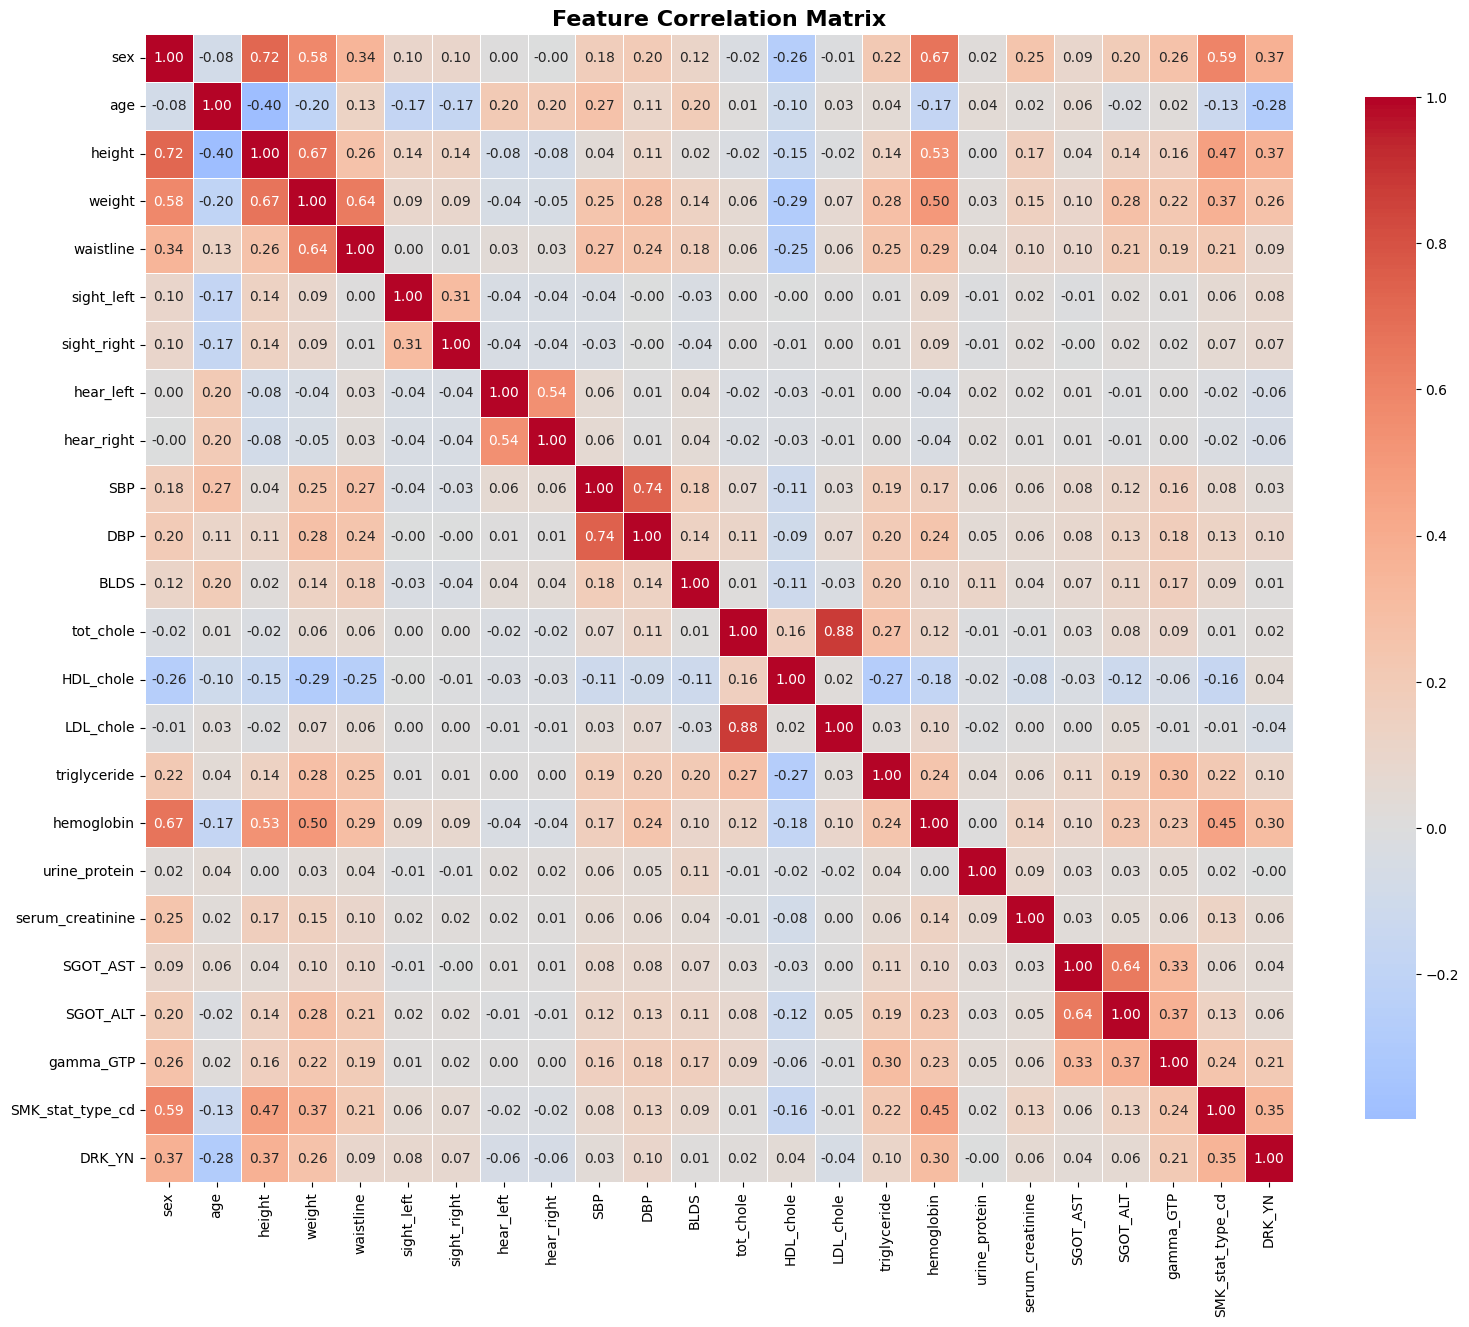

CORRELATIONS WITH TARGET VARIABLES

Top 10 features correlated with SMOKING STATUS:
SMK_stat_type_cd    1.000000
sex                 0.591004
height              0.467317
hemoglobin          0.453385
weight              0.366499
DRK_YN              0.350784
gamma_GTP           0.243576
triglyceride        0.216026
waistline           0.205485
SGOT_ALT            0.131569
Name: SMK_stat_type_cd, dtype: float64

Top 10 features correlated with DRINKING STATUS:
DRK_YN              1.000000
height              0.374566
sex                 0.368726
SMK_stat_type_cd    0.350784
hemoglobin          0.299341
weight              0.264282
gamma_GTP           0.205094
triglyceride        0.104398
DBP                 0.100876
waistline           0.092993
Name: DRK_YN, dtype: float64


In [51]:
# Correlation heatmap
plt.figure(figsize=(16, 14))

# Calcola correlazioni
correlation_matrix = df.corr()

# Crea heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Focus on correlations with target variables
print("=" * 60)
print("CORRELATIONS WITH TARGET VARIABLES")
print("=" * 60)

# Smoking correlations
smoking_corr = correlation_matrix['SMK_stat_type_cd'].sort_values(ascending=False)
print("\nTop 10 features correlated with SMOKING STATUS:")
print(smoking_corr.head(10))

# Drinking correlations
drinking_corr = correlation_matrix['DRK_YN'].sort_values(ascending=False)
print("\nTop 10 features correlated with DRINKING STATUS:")
print(drinking_corr.head(10))

### Smoking status split

In [ ]:
from sklearn.model_selection import train_test_split

# Smoking status split (solo per task1)
X_smoke = df.drop('SMK_stat_type_cd', axis=1)
y_smoke = df['SMK_stat_type_cd']

X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = train_test_split(
    X_smoke, y_smoke, 
    test_size=0.30, 
    random_state=101, 
    stratify=y_smoke   # Mantiene proporzione di ciascuna classe anche tra train e test
)

print(X_train_smoke.shape, X_test_smoke.shape)

### Drinking status split

In [ ]:
# Drinking status split (task2)
X_drink = df.drop('DRK_YN', axis=1)
y_drink = df['DRK_YN']

X_train_drink, X_test_drink, y_train_drink, y_test_drink = train_test_split(
    X_drink, y_drink, 
    test_size=0.30, 
    random_state=101,
    stratify=y_drink   # Qui è molto bilanciato, ma sempre buona pratica
)

print(X_train_drink.shape, X_test_drink.shape)

## 5. Modeling - Task 1: Smoking Status

## 6. Modeling - Task 2: Drinking Status

## 7. Model Evaluation

## 8. Insights

## 9. Conclusion